In [1]:
from nltk.corpus import stopwords # Removing unwanted meaningless words like "the, a , is, of, etc."
import re # For applying some NLP pre-processing task
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # To check the accuracy of the model
import pandas as pd

In [2]:
import re

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
import pandas as pd

In [32]:
data = pd.read_csv("cuisine_data.csv")
data.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


In [7]:
data.head()

,cuisine_description,cuisine
0,romaine lettuce black olives grape tomatoes ga...,greek
1,plain flour ground pepper salt tomatoes ground...,southern_us
2,eggs pepper salt mayonaise cooking oil green c...,filipino
3,water vegetable oil wheat salt,indian
4,black pepper shallots cornflour cayenne pepper...,indian


In [33]:
data.shape

(39774, 2)

In [ ]:
data.shape
(39774, 2)

In [8]:
# Check what is the count of the classes in Target Variable Cuisine
len(data.cuisine.value_counts())

20

In [9]:
# Now let us check which are these 20 cuisines in Target Variable Cuisine
data.cuisine.unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

[Text(0, 0, 'greek'),
 Text(0, 0, 'southern_us'),
 Text(0, 0, 'filipino'),
 Text(0, 0, 'indian'),
 Text(0, 0, 'jamaican'),
 Text(0, 0, 'spanish'),
 Text(0, 0, 'italian'),
 Text(0, 0, 'mexican'),
 Text(0, 0, 'chinese'),
 Text(0, 0, 'british'),
 Text(0, 0, 'thai'),
 Text(0, 0, 'vietnamese'),
 Text(0, 0, 'cajun_creole'),
 Text(0, 0, 'brazilian'),
 Text(0, 0, 'french'),
 Text(0, 0, 'japanese'),
 Text(0, 0, 'irish'),
 Text(0, 0, 'korean'),
 Text(0, 0, 'moroccan'),
 Text(0, 0, 'russian')]

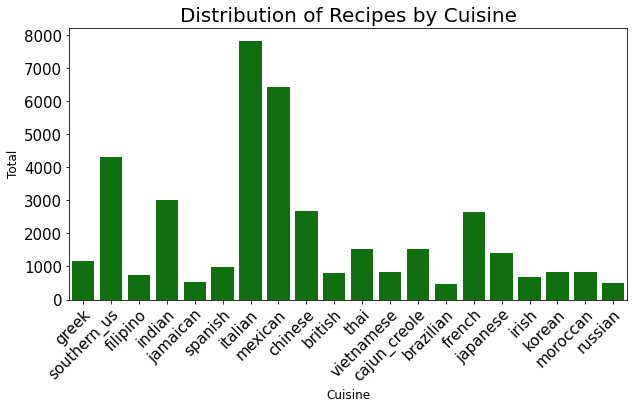

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, sharey=False, figsize=(10,5))
g = sns.countplot(data.cuisine, color = 'green')
g.set_xlabel("Cuisine",fontsize=12)
g.set_ylabel("Total",fontsize=12)
g.set_title("Distribution of Recipes by Cuisine",fontsize=20)
g.tick_params(labelsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

## Checking for missing values

In [10]:
data.isnull().sum()

cuisine_description    0
cuisine                0
dtype: int64

There are no missing values in the data

## Dropping duplicates

In [11]:
# Checking no. of rows before removing duplicates
data.shape

(39774, 2)

In [12]:
data.drop_duplicates(inplace = True)
data.shape

In [13]:
# Checking no. of rows after removing duplicates
data.shape

(39677, 2)

In [34]:
39774 - 39677

97

## Preprocessing the text

In [14]:
# Let us check how many words are present in the Cusine Desription column
print(data['cuisine_description'].apply(lambda x: len(x.split(' '))).sum())

806112


So we have around 8,06,112 words

In [15]:
# Now from 8,06,112 words, we will be removing stopwords, special characters and unwanted symbols which generally occur into ur dataset coz of different data sources and encoding problems.
special_character_remover = re.compile('[/(){}\[\]\|@,:]') # We will be removing special characters
extra_symbol_remover = re.compile('[^0-9a-z #+_]') # We will be removing unwanted symbols
STOPWORDS = set(stopwords.words('english'))

In [16]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text) # Replacing these characters with spaces
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

data['cuisine_description'] = data['cuisine_description'].apply(clean_text)

In [17]:
print(data['cuisine_description'].apply(lambda x: len(x.split(' '))).sum())

803337


In [35]:
806112 - 803337

2775

## Train Test split

In [21]:
x = data.cuisine_description
y = data.cuisine
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27773,), (11904,), (27773,), (11904,))

## Applying Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

# With the help of CountVectorizer and TfidfTransformer the entire texts will be converted into numeric form before building
# a model since model understands number. So on the basis of this numeric output which we will get from CountVectorizer and
# TfidfTransformer, We will be building model on it.
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression())
              ])

lr.fit(x_train, y_train) # Training the model
y_pred1 = lr.predict(x_test) # Predicting on test data

print(f"Accuracy of Logistic Regression is : {accuracy_score(y_pred1,y_test)}") # Calculating Accuracy

C:\Users\saha.sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression is : 0.7819220430107527


## Applying Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import MultinomialNB

naivebayes = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())
                      ])
naivebayes.fit(x_train, y_train)
y_pred2 = naivebayes.predict(x_test)

print(f"Accuracy of Naive Bayes Classifier is : {accuracy_score(y_pred2,y_test)}")

Accuracy of Naive Bayes Classifier is : 0.6682627688172043


## Applying XGBoost Classifier

In [37]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', XGBClassifier())
                      ])
xgboost.fit(x_train, y_train)

y_pred = xgboost.predict(x_test)

print(f"Accuracy of XGBoost Classifier is : {accuracy_score(y_pred,y_test)}")

C:\Users\saha.sourav\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost Classifier is : 0.7780577956989247
